### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import pickle

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
# sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
# Not italized latex
matplotlib.rcParams["mathtext.default"] = "regular"
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='png'

# Retina quality for plots
%config InlineBackend.figure_format = 'retina'


### Load data

In [2]:
# df_input = pd.read_parquet(
#     "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/input_particles.parquet"
# )
df_input = pd.read_parquet("/Users/cdroin/Desktop/dynamic_octupoles/gen_3/input_particles.parquet")
# df_output = pd.read_parquet(
#     "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/output_particles.parquet"
# )
df_output = pd.read_parquet("/Users/cdroin/Desktop/dynamic_octupoles/gen_3/output_particles.parquet")
# with open(
#     "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3/observables.pkl",
#     "rb",
# ) as f:
#     dic_obs = pickle.load(f)
with open("/Users/cdroin/Desktop/dynamic_octupoles/gen_3/observables.pkl", "rb") as f:
    dic_obs = pickle.load(f)

dic_obs

{'l_df_particles': [       particle_id         x        px         y            py      zeta  \
  0                0 -0.002035  0.000031  0.000314  7.926965e-07 -0.030514   
  1                1  0.000454 -0.000005 -0.000142 -4.302719e-06 -0.001277   
  2                2  0.000045 -0.000016  0.000825  1.195761e-05  0.107490   
  3                3 -0.002089  0.000030 -0.000273 -4.299139e-07 -0.110436   
  4                4 -0.001246  0.000008  0.000291  4.063916e-07  0.122816   
  ...            ...       ...       ...       ...           ...       ...   
  19995        19995 -0.000472  0.000006  0.000197  3.447199e-06  0.067705   
  19996        19996  0.001296 -0.000012  0.000517  4.268843e-06 -0.087080   
  19997        19997 -0.000371  0.000007  0.002081  2.639759e-05 -0.045262   
  19998        19998 -0.001824  0.000025  0.000330  6.928673e-06  0.001789   
  19999        19999 -0.000420 -0.000015 -0.000355 -9.639532e-06 -0.008264   
  
            pzeta  particle_id_norm    x_no

In [3]:
# Remove lost particles
dic_obs['l_df_particles'] = [df_particles[df_particles['state']==1] for df_particles in dic_obs['l_df_particles']]

### Plot initial and final distribution

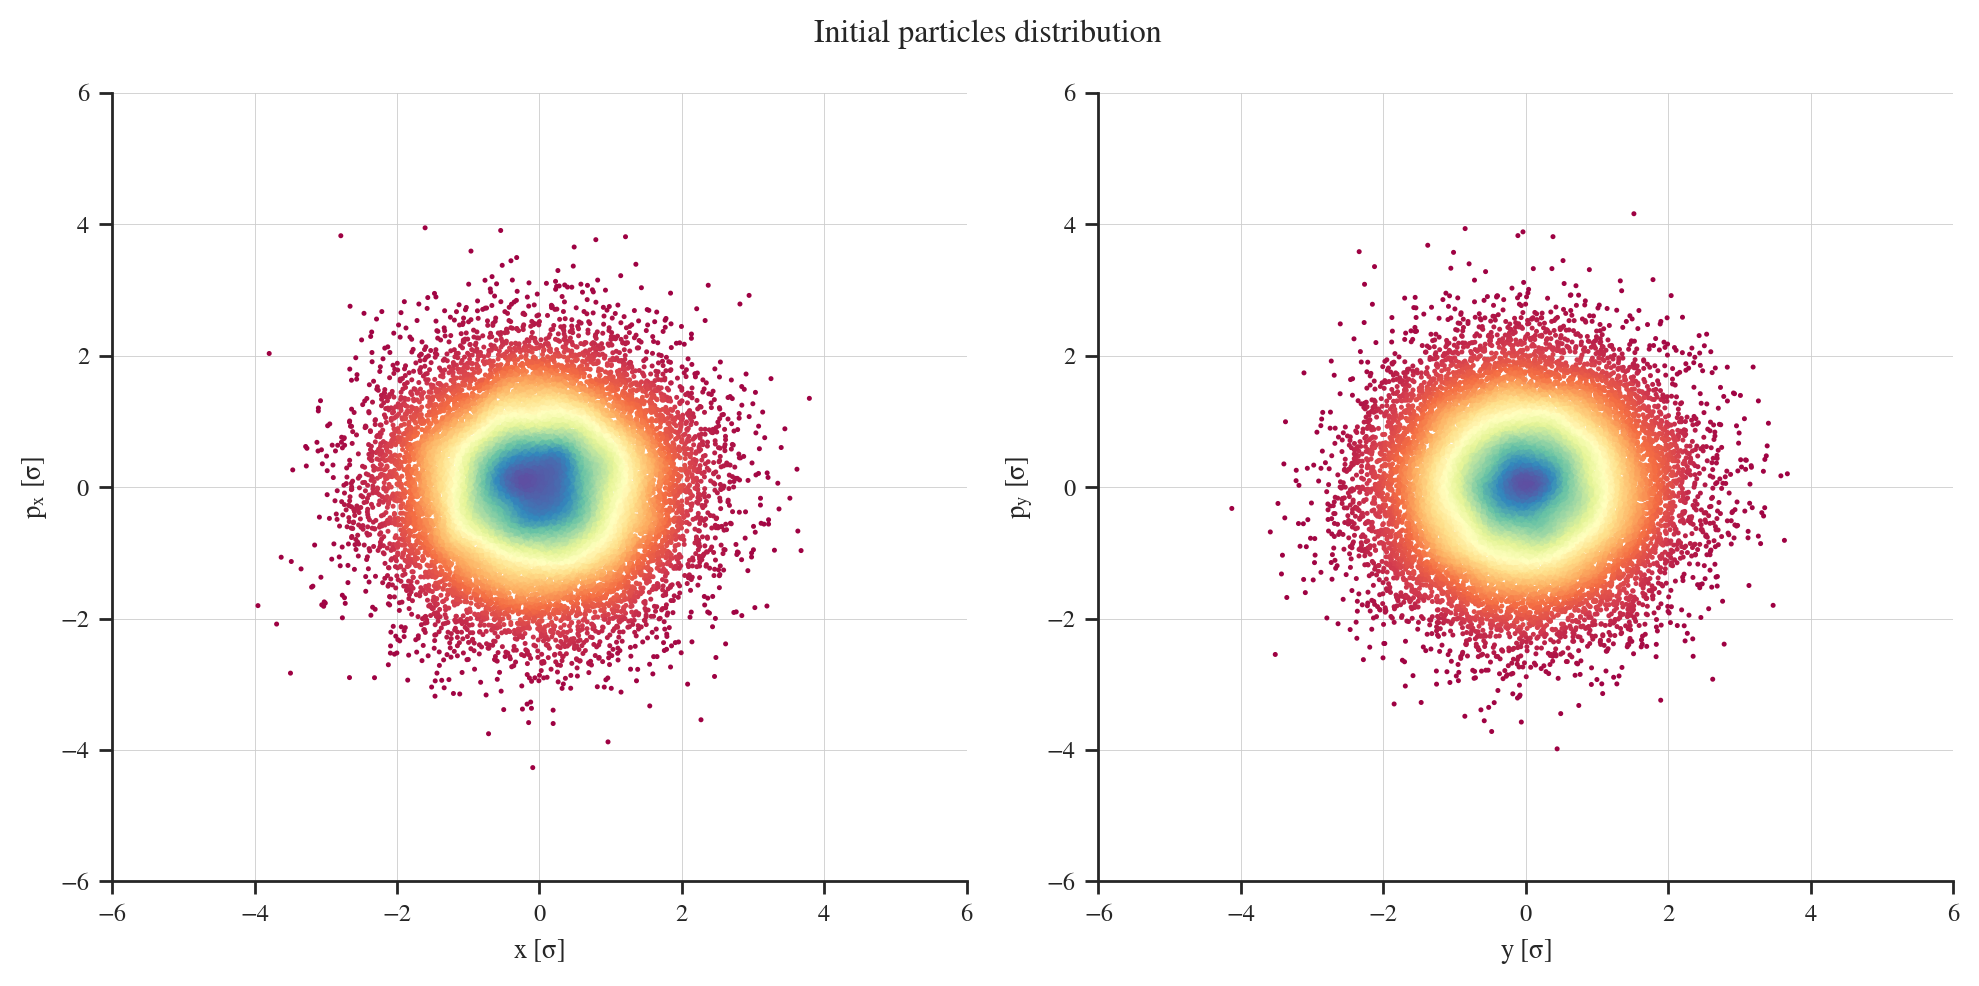

In [4]:
df_input_with_norm = dic_obs["l_df_particles"][0]

x_input = df_input_with_norm["x_norm"]
y_input = df_input_with_norm["y_norm"]
px_input = df_input_with_norm["px_norm"]
py_input = df_input_with_norm["py_norm"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-6, 6)
plt.suptitle("Initial particles distribution")
plt.tight_layout()
plt.savefig("initial_particles_distribution.png", dpi=300)
plt.show()

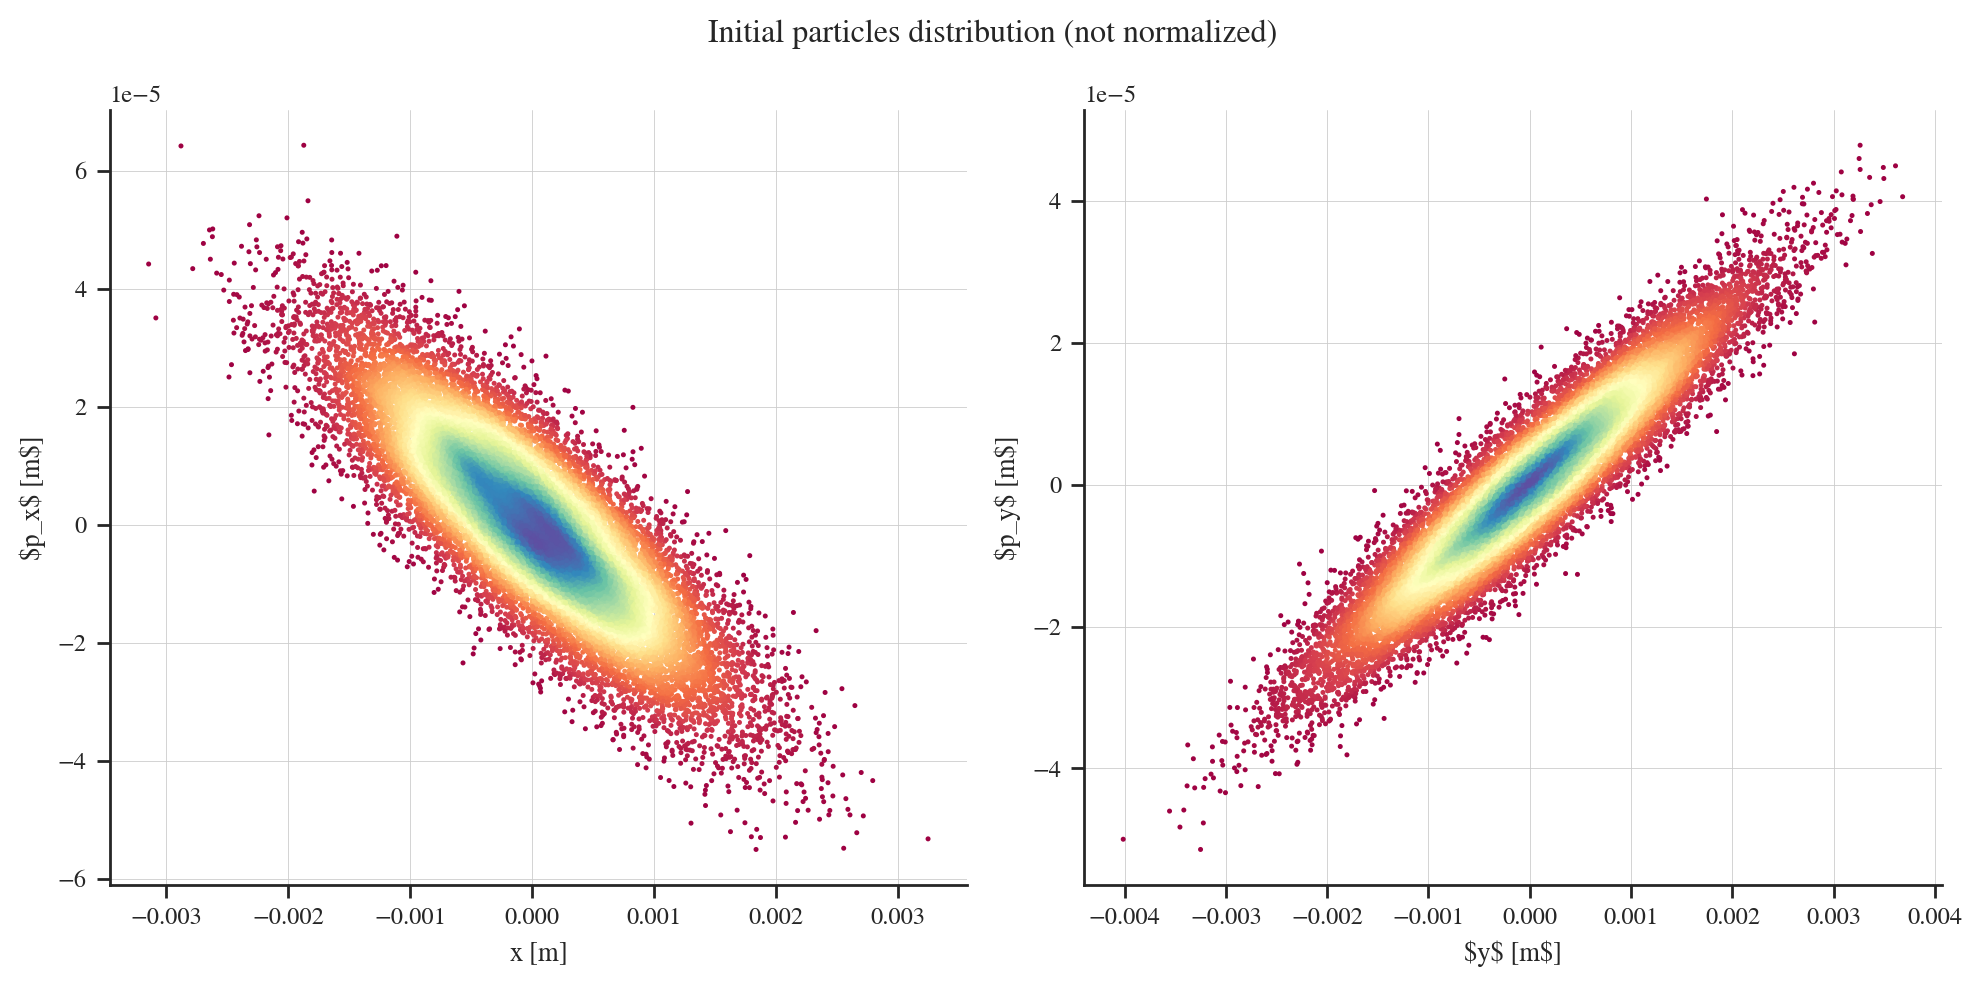

In [11]:
df_input_with_norm = dic_obs["l_df_particles"][0]

x_input = df_input_with_norm["x"]
y_input = df_input_with_norm["y"]
px_input = df_input_with_norm["px"]
py_input = df_input_with_norm["py"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [m]")
ax[0].set_ylabel(r"$p_x$ [m$]")
ax[0].grid()
#ax[0].set_xlim(-6, 6)
#ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [m$]")
ax[1].set_ylabel(r"$p_y$ [m$]")
ax[1].grid()
#ax[1].set_xlim(-6, 6)
#ax[1].set_ylim(-6, 6)
plt.suptitle("Initial particles distribution (not normalized)")
plt.tight_layout()
plt.savefig("initial_particles_distribution_unnormalized.png", dpi=300)
plt.show()

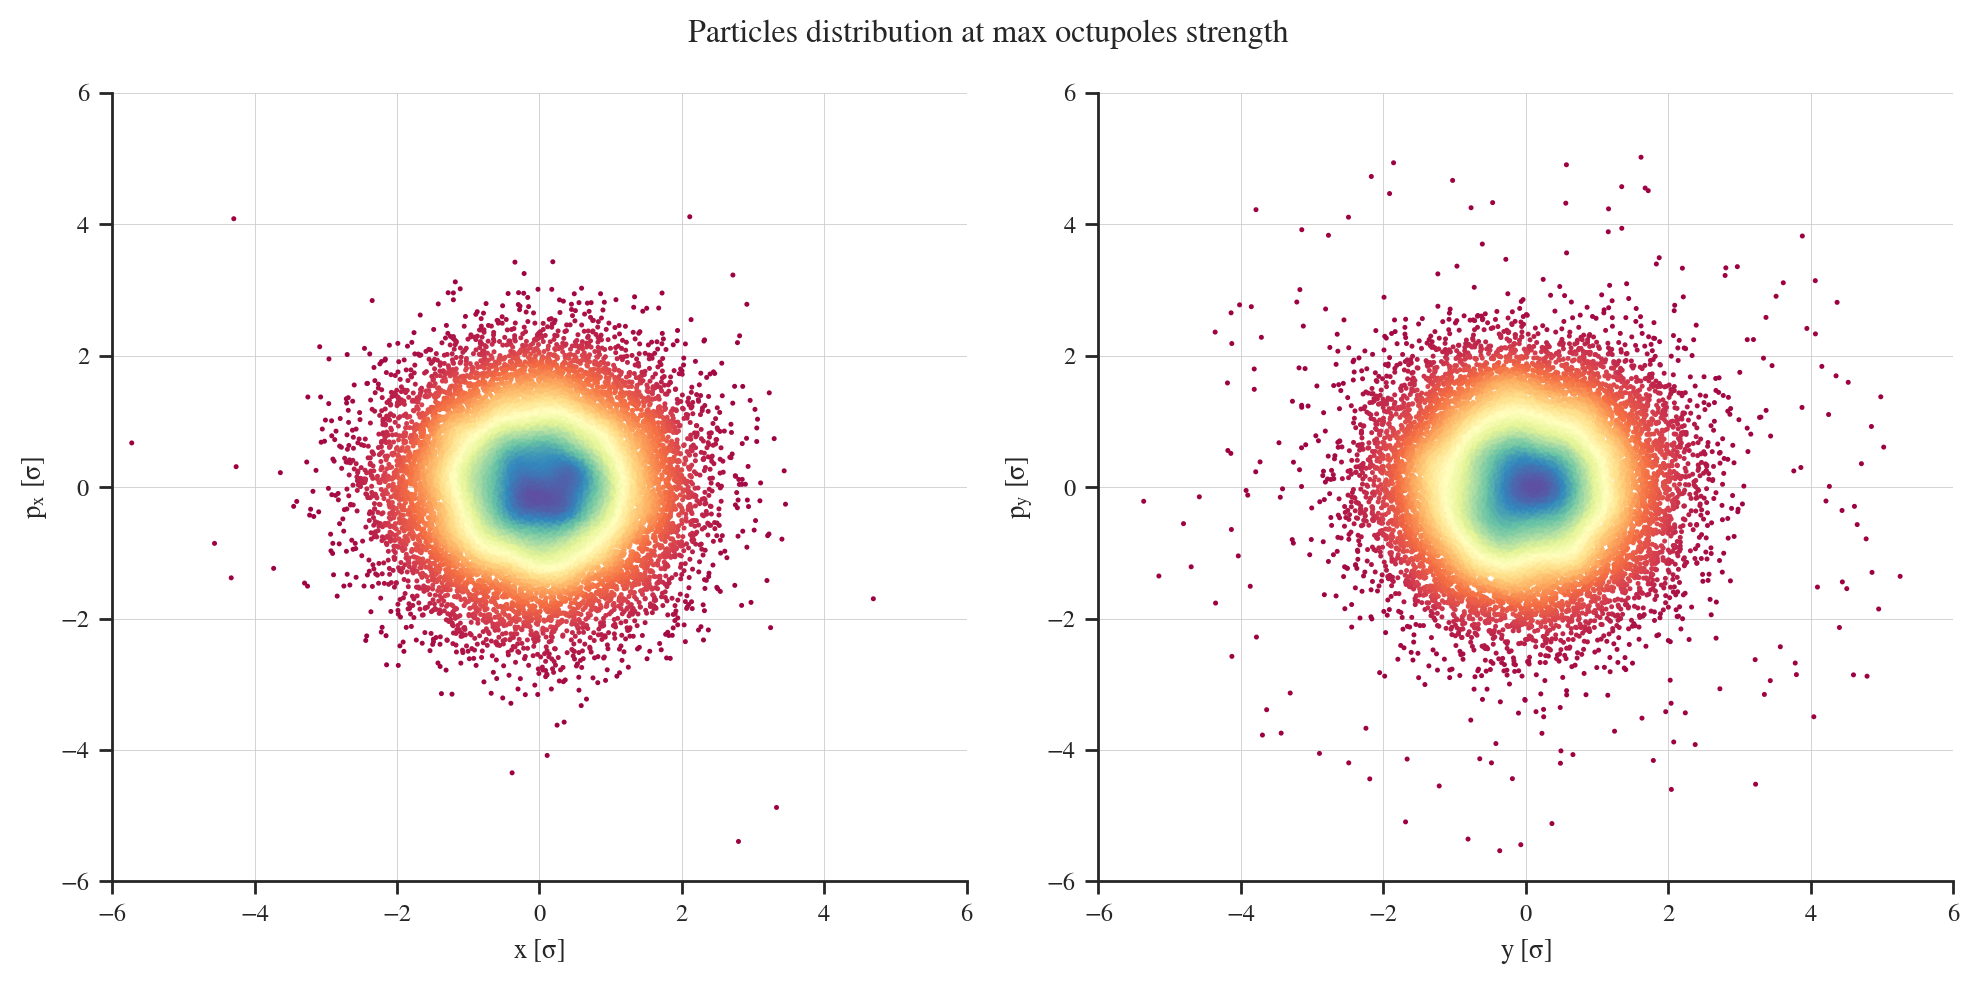

In [5]:
df_input_with_norm = dic_obs["l_df_particles"][int(len(dic_obs["l_df_particles"])/2)]

x_input = df_input_with_norm["x_norm"]
y_input = df_input_with_norm["y_norm"]
px_input = df_input_with_norm["px_norm"]
py_input = df_input_with_norm["py_norm"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-6, 6)
plt.suptitle("Particles distribution at max octupoles strength")
plt.tight_layout()
plt.savefig("max_octupoles_particles_distribution.png", dpi=300)
plt.show()

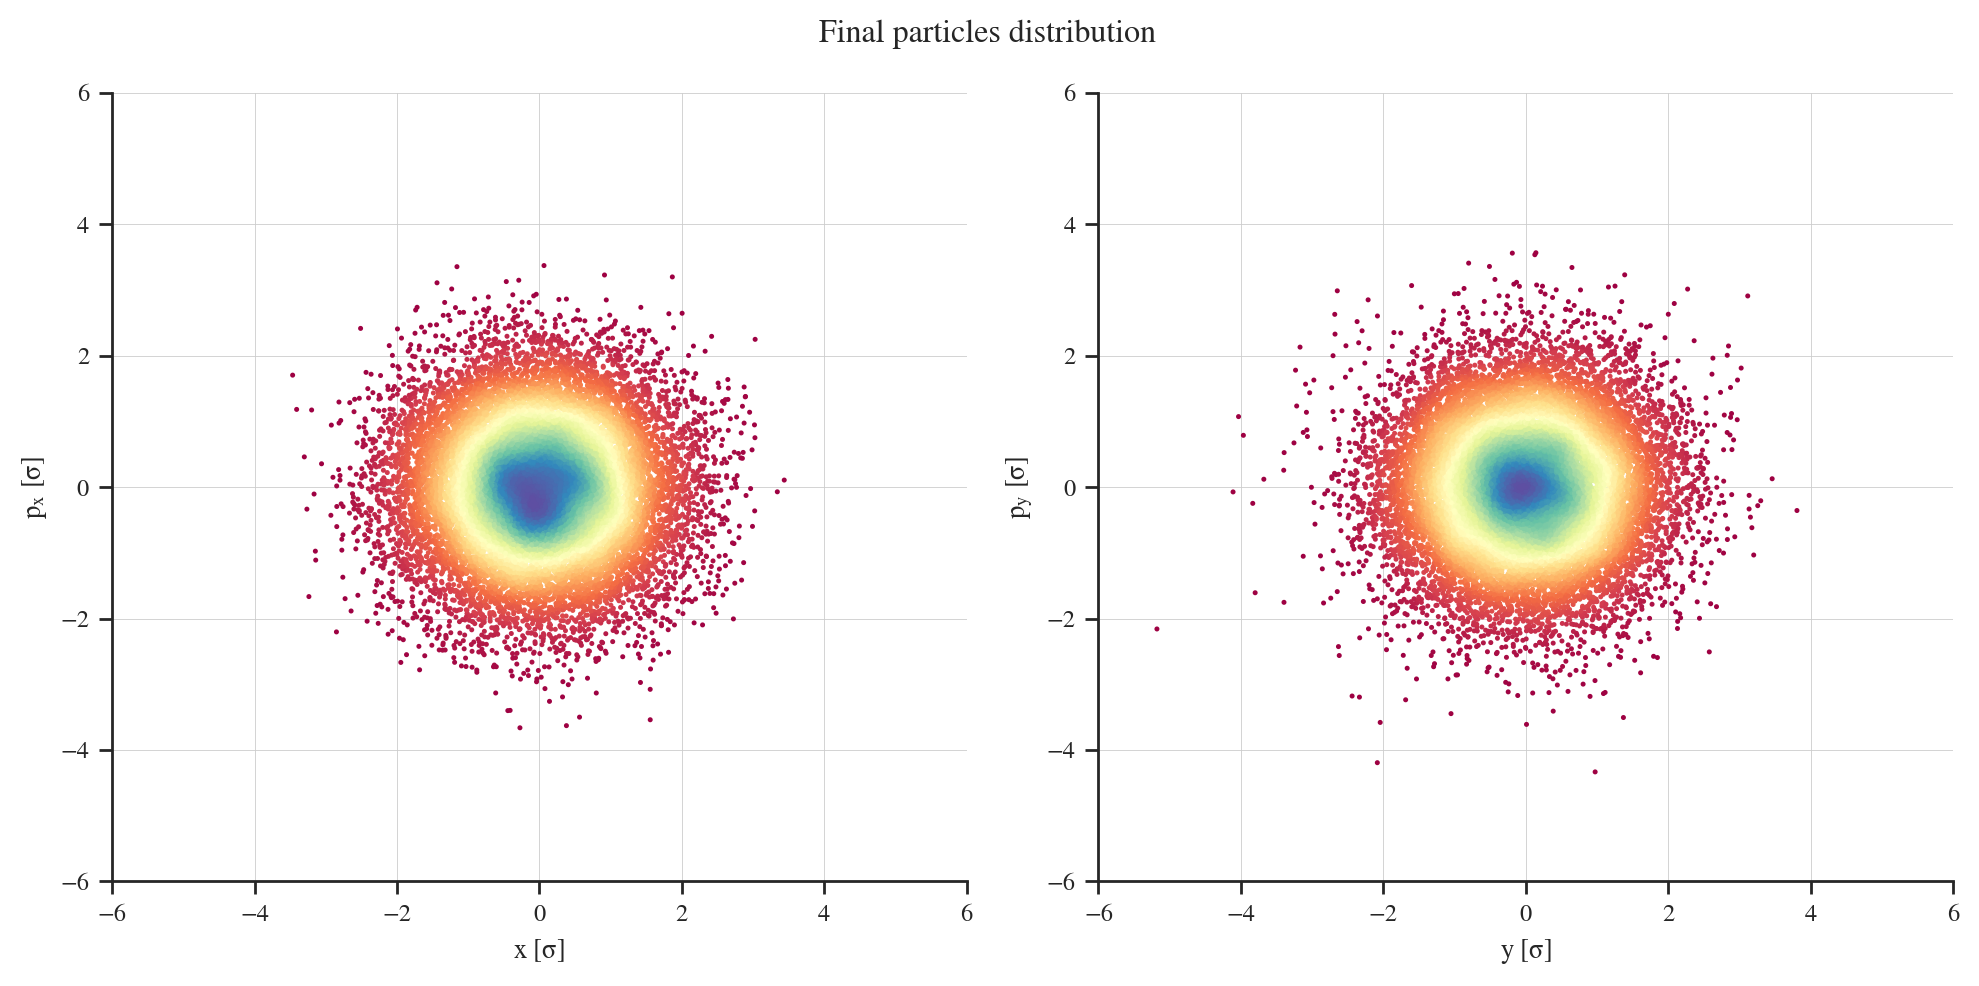

In [6]:
df_input_with_norm = dic_obs["l_df_particles"][-1]

x_input = df_input_with_norm["x_norm"]
y_input = df_input_with_norm["y_norm"]
px_input = df_input_with_norm["px_norm"]
py_input = df_input_with_norm["py_norm"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-6, 6)
plt.suptitle("Final particles distribution")
plt.tight_layout()
plt.savefig("final_particles_distribution.png", dpi=300)
plt.show()

### Plot evolution octupoles and particles loss

In [7]:
l_n_particles = [len(df) for df in dic_obs["l_df_particles"]]
l_n_particles_lost = [(len(dic_obs["l_df_particles"][0]) - n)*100/len(dic_obs["l_df_particles"][0]) for n in l_n_particles]

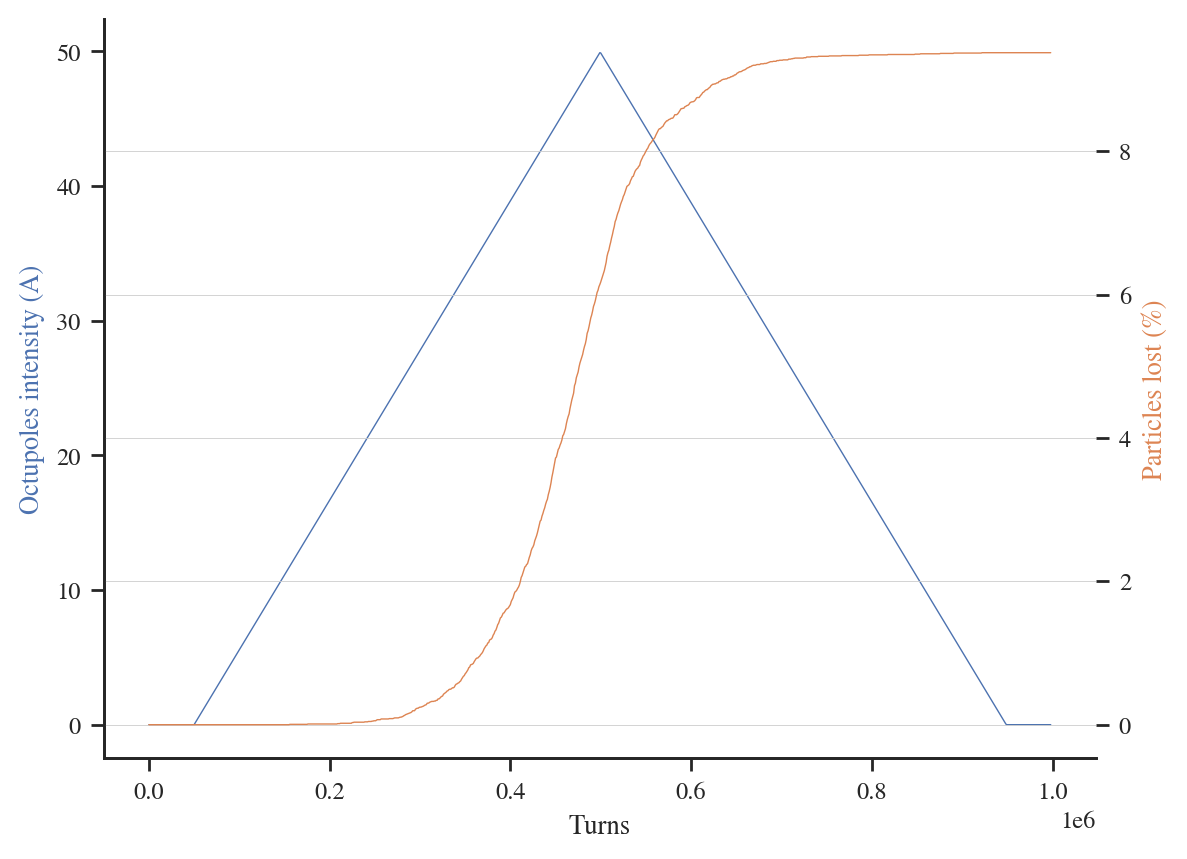

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(dic_obs["l_n_turns"], dic_obs["l_oct"], color = 'C0')
ax2.plot(dic_obs["l_n_turns"], l_n_particles_lost, color = 'C1')
ax1.set_xlabel("Turns")
ax1.set_ylabel("Octupoles intensity (A)", color = 'C0')
ax2.set_ylabel("Particles lost (%)", color = 'C1')
plt.grid()
plt.savefig("octupoles_intensity_and_particles_lost.png", dpi=300)
plt.show()


### Plot evolution distribution

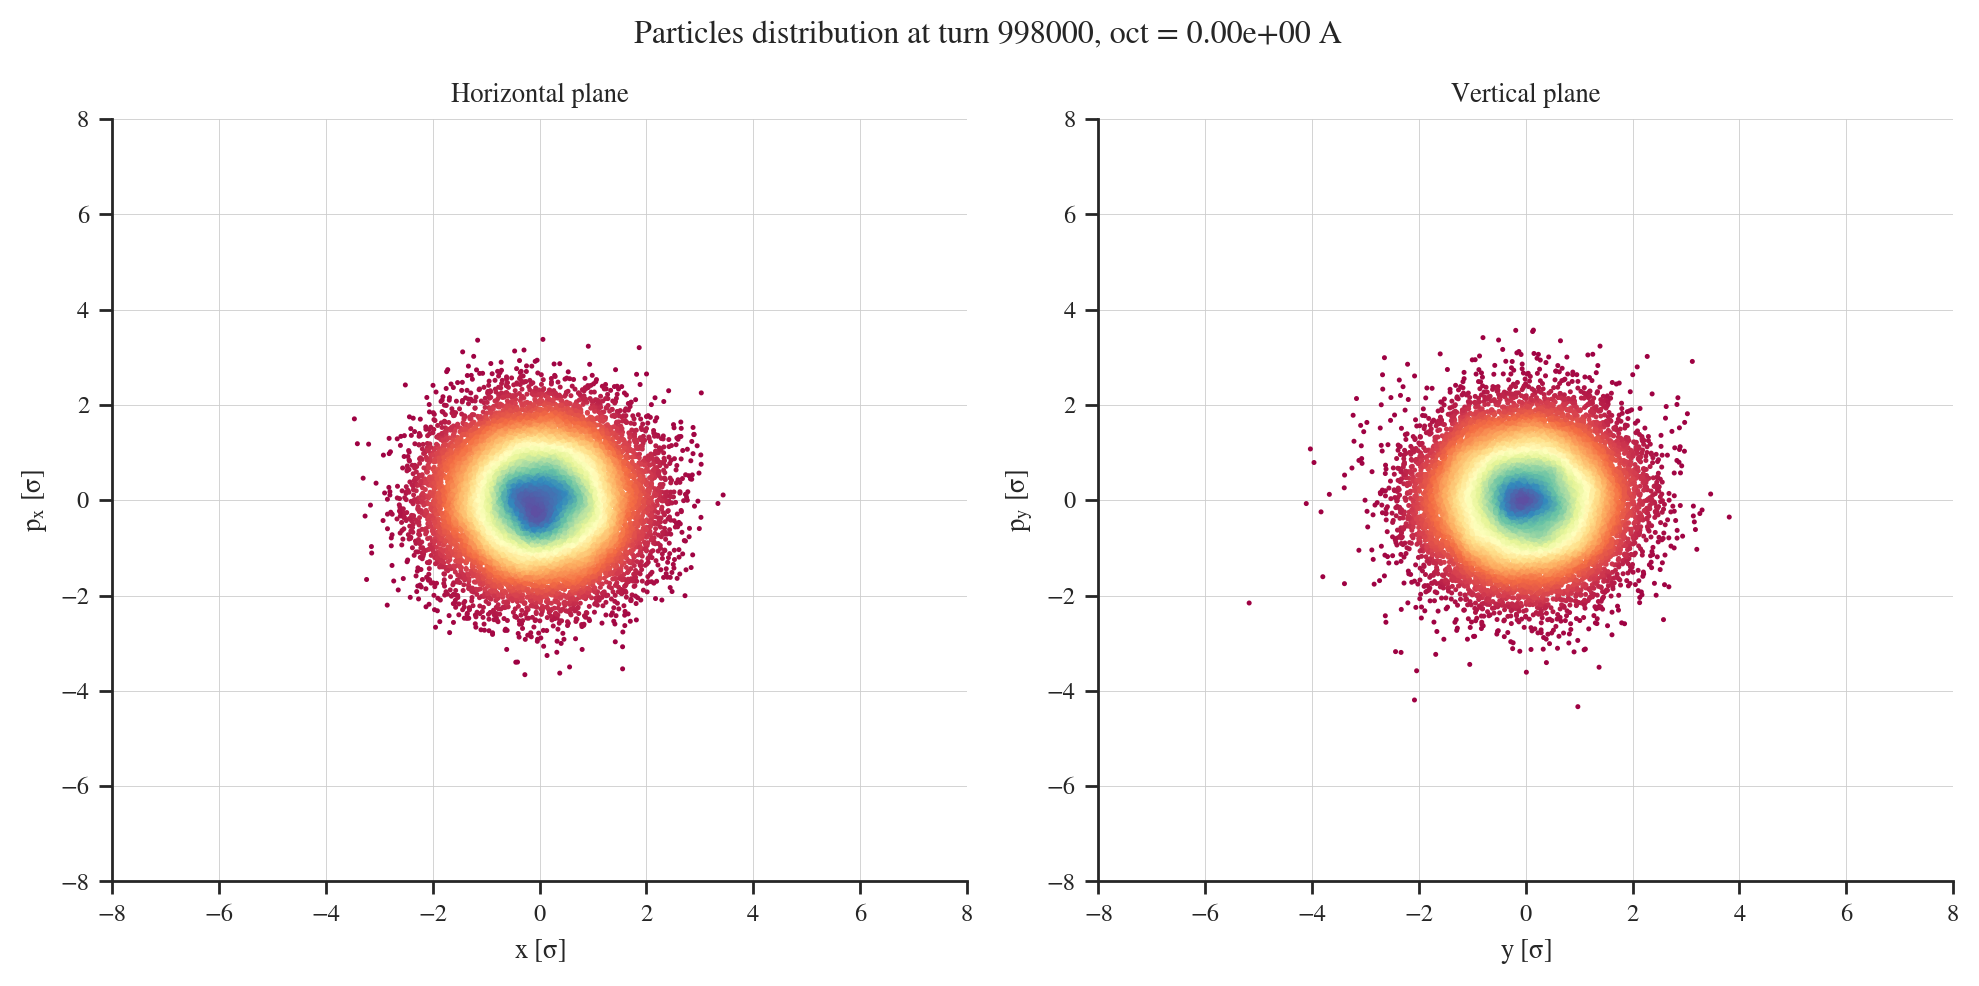

In [13]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    ax[0].clear()
    ax[1].clear()
    
    df_turn = dic_obs['l_df_particles'][frame]
    turns = dic_obs['l_n_turns'][frame]

    # Calculate the point density
    array_x_density = np.vstack([df_turn["x_norm"],df_turn["px_norm"]])
    x_density = gaussian_kde(array_x_density)(array_x_density)
    array_y_density = np.vstack([df_turn["y_norm"],df_turn["py_norm"]])
    y_density = gaussian_kde(array_y_density)(array_y_density)

    ax[0].scatter(df_turn["x_norm"], df_turn["px_norm"], s=1, c = x_density, cmap = "Spectral")
    ax[0].set_xlabel(r"$x$ [$\sigma$]")
    ax[0].set_ylabel(r"$p_x$ [$\sigma$]")

    ax[1].scatter(df_turn["y_norm"], df_turn["py_norm"], s=1, c = y_density, cmap = "Spectral")
    ax[1].set_xlabel(r"$y$ [$\sigma$]")
    ax[1].set_ylabel(r"$p_y$ [$\sigma$]")

    ax[0].set_xlim(-8, 8)
    ax[0].set_ylim(-8, 8)
    ax[1].set_xlim(-8, 8)
    ax[1].set_ylim(-8, 8)

    ax[0].set_title("Horizontal plane")
    ax[1].set_title("Vertical plane")

    ax[0].grid()
    ax[1].grid()
    
    plt.suptitle(f"Particles distribution at turn {turns}, oct = {dic_obs['l_oct'][frame]:.2f} A")

    # ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    # ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

    # Position legend at top right
    # ax[0].legend( loc='upper right')
    # ax[1].legend( loc='upper right')

    plt.tight_layout()

# Assuming you have df as your DataFrame
animation = FuncAnimation(fig, update, frames=len(dic_obs['l_df_particles']), interval=100, repeat=False)
#animation = FuncAnimation(fig, update, frames=10, interval=100, repeat=False)

# Save the animation as a GIF using PillowWriter
animation.save('animation.gif', writer='pillow', fps=100)

plt.show()

### Plot evolution emittance

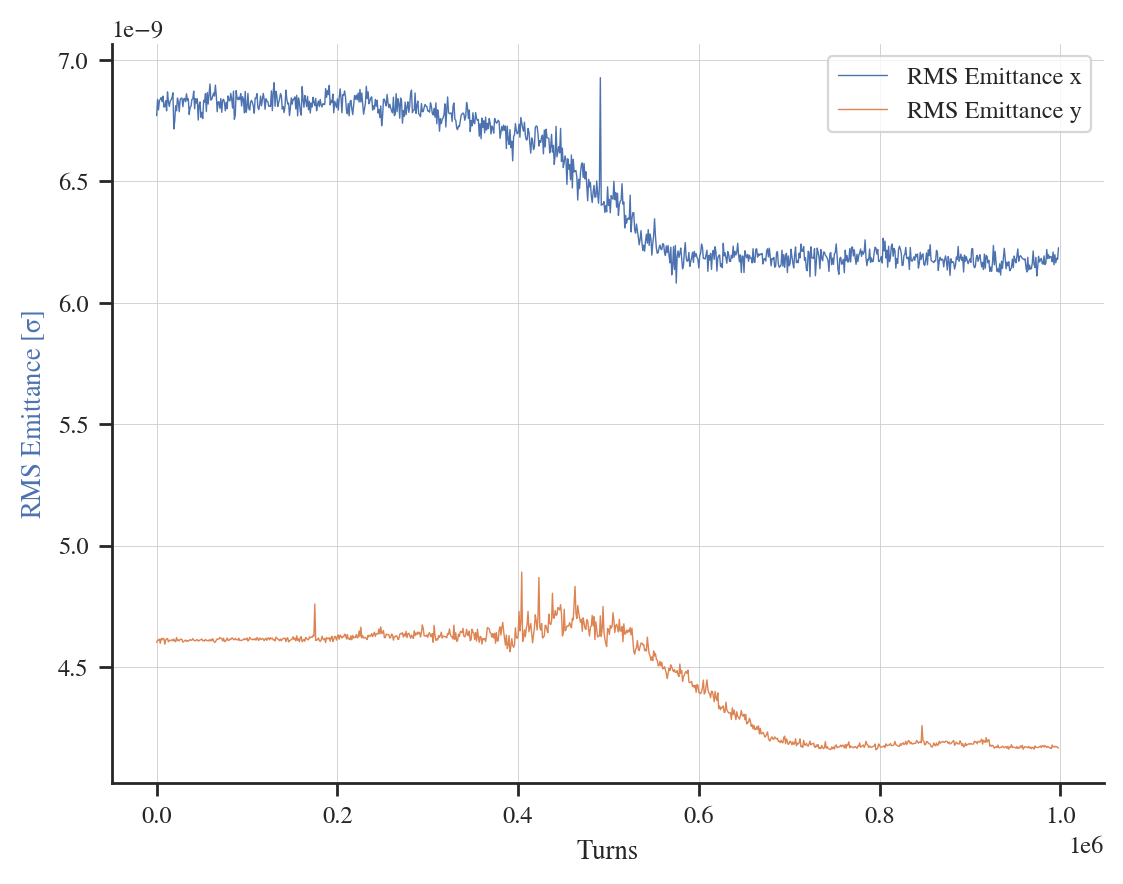

In [9]:
# Get emittance
l_emittance_x = []
l_emittance_y = []
for i, df in enumerate(dic_obs["l_df_particles"]):
    emittance_x = np.sqrt(
        np.mean(df["x"]**2) * np.mean(df["px"]**2)
        - np.mean(df["x"] * df["px"]) ** 2
    )
    emittance_y = np.sqrt(
        np.mean(df["y"]**2) * np.mean(df["py"]**2)
        - np.mean(df["y"] * df["py"]) ** 2
    )
    l_emittance_x.append(emittance_x)
    l_emittance_y.append(emittance_y)

fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

ax1.plot(dic_obs["l_n_turns"], l_emittance_x, color = 'C0', label = "RMS Emittance x")
ax1.plot(dic_obs["l_n_turns"], l_emittance_y, color = 'C1', label = "RMS Emittance y")
ax1.set_xlabel("Turns")
ax1.set_ylabel("RMS Emittance [$\sigma$]", color = 'C0')
#ax2.set_ylabel("Emittance y [$\sigma$]", color = 'C1')
plt.grid()
plt.legend()
plt.savefig("emittance.png", dpi=300)
plt.show()

